In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_parlement.xlsx to dataset_parlement.xlsx


In [2]:
import numpy as np
import pandas as pd
df_parl = pd.read_excel("dataset_parlement.xlsx")
print(df_parl.head)

<bound method NDFrame.head of      CouncillorId        CouncillorName Groupe parlementaire Canton  \
0            3055        Addor Jean-Luc                    V     VS   
1            2670          Aebi Andreas                    V     BE   
2            2760    Aebischer Matthias                    S     BE   
3            2758         Aeschi Thomas                    V     ZG   
4            2796       Amaudruz Celine                    V     GE   
..            ...                   ...                  ...    ...   
196          3202  Wismer-Felder Priska                  M-E     LU   
197          2638        Wobmann Walter                    V     SO   
198          3214            Wyss Sarah                    S     BS   
199          3102    Zuberbuehler David                    V     AR   
200          3223       Imboden Natalie                    G     BE   

    Date de naissance  Age Sexe Date de l'assermentation  \
0          1964-04-22   58    M               2019-12-02 

In [3]:
groupes_parlementaires = df_parl['Groupe parlementaire'].unique()
print(groupes_parlementaires)

['V' 'S' 'G' 'GL' 'M-E' 'RL']


In [4]:
df_parl['Groupe parlementaire'] = df_parl['Groupe parlementaire'].replace(['V', 'GL','RL'],'Right')
df_parl['Groupe parlementaire'] = df_parl['Groupe parlementaire'].replace(['S', 'G',],'Left')
df_parl['Groupe parlementaire'] = df_parl['Groupe parlementaire'].replace(['M-E'],'Center')

In [5]:
groupes_parlementaires2 = df_parl['Groupe parlementaire'].unique()
print(groupes_parlementaires2)

['Right' 'Left' 'Center']


In [6]:
df_parl.columns.get_loc("01. Augmentation progressive des depenses de l'armee")

8

In [7]:
df_parl.columns.get_loc("96. economie sociale, gestion participative, service public. Quelles leçons pour la Suisse?")

103

In [8]:
df_parl.columns.values[8:104]=["Vote_"+str(i) for i in range(1, 97)]

In [9]:
print(df_parl.columns.get_loc("Vote_GP_01"))
print(df_parl.columns.get_loc("Vote_GP_96"))

104
199


In [10]:
df_parl.columns.values[104:200]=["GPVote_"+str(i) for i in range(1, 97)]

In [11]:
df_parl = df_parl.loc[:, ~df_parl.columns.str.startswith('Same_')]

In [12]:
df_parl['Vote_1'].value_counts()

Oui                      111
Non                       79
Excuse                     5
Pas participe              2
Abstention                 2
President ne vote pas      1
Name: Vote_1, dtype: int64

In [13]:
df_parl = df_parl.replace('Excuse', np.nan)
df_parl = df_parl.replace('Pas participe', np.nan)
df_parl = df_parl.replace('Abstention', np.nan)
df_parl = df_parl.replace('President ne vote pas', np.nan)

In [14]:
df_parl['Vote_1'].value_counts()

Oui    111
Non     79
Name: Vote_1, dtype: int64

In [15]:
print(df_parl['Vote_1'].head)

<bound method NDFrame.head of 0      Oui
1      Oui
2      Non
3      Oui
4      Oui
      ... 
196    Oui
197    Oui
198    Non
199    Oui
200    NaN
Name: Vote_1, Length: 201, dtype: object>


In [16]:
df_parl.loc[df_parl['Vote_1'].str.contains("Non") & df_parl['GPVote_1'].str.contains("Oui"),'Same_1'] = '1'
df_parl.loc[df_parl['Vote_1'].str.contains("Oui") & df_parl['GPVote_1'].str.contains("Non"),'Same_1'] = '1'

df_parl.loc[df_parl['Vote_2'].str.contains("Non") & df_parl['GPVote_2'].str.contains("Oui"),'Same_2'] = '1'
df_parl.loc[df_parl['Vote_2'].str.contains("Oui") & df_parl['GPVote_2'].str.contains("Non"),'Same_2'] = '1'

df_parl.loc[df_parl['Vote_3'].str.contains("Non") & df_parl['GPVote_3'].str.contains("Oui"),'Same_3'] = '1'
df_parl.loc[df_parl['Vote_3'].str.contains("Oui") & df_parl['GPVote_3'].str.contains("Non"),'Same_3'] = '1'

df_parl.loc[df_parl['Vote_4'].str.contains("Non") & df_parl['GPVote_4'].str.contains("Oui"),'Same_4'] = '1'
df_parl.loc[df_parl['Vote_4'].str.contains("Oui") & df_parl['GPVote_4'].str.contains("Non"),'Same_4'] = '1'

df_parl.loc[df_parl['Vote_5'].str.contains("Non") & df_parl['GPVote_5'].str.contains("Oui"),'Same_5'] = '1'
df_parl.loc[df_parl['Vote_5'].str.contains("Oui") & df_parl['GPVote_5'].str.contains("Non"),'Same_5'] = '1'

df_parl.loc[df_parl['Vote_6'].str.contains("Non") & df_parl['GPVote_6'].str.contains("Oui"),'Same_6'] = '1'
df_parl.loc[df_parl['Vote_6'].str.contains("Oui") & df_parl['GPVote_6'].str.contains("Non"),'Same_6'] = '1'

df_parl.loc[df_parl['Vote_7'].str.contains("Non") & df_parl['GPVote_7'].str.contains("Oui"),'Same_7'] = '1'
df_parl.loc[df_parl['Vote_7'].str.contains("Oui") & df_parl['GPVote_7'].str.contains("Non"),'Same_7'] = '1'

df_parl.loc[df_parl['Vote_8'].str.contains("Non") & df_parl['GPVote_8'].str.contains("Oui"),'Same_8'] = '1'
df_parl.loc[df_parl['Vote_8'].str.contains("Oui") & df_parl['GPVote_8'].str.contains("Non"),'Same_8'] = '1'

df_parl.loc[df_parl['Vote_9'].str.contains("Non") & df_parl['GPVote_9'].str.contains("Oui"),'Same_9'] = '1'
df_parl.loc[df_parl['Vote_9'].str.contains("Oui") & df_parl['GPVote_9'].str.contains("Non"),'Same_9'] = '1'

df_parl.loc[df_parl['Vote_10'].str.contains("Non") & df_parl['GPVote_10'].str.contains("Oui"),'Same_10'] = '1'
df_parl.loc[df_parl['Vote_10'].str.contains("Oui") & df_parl['GPVote_10'].str.contains("Non"),'Same_10'] = '1'

df_parl.loc[df_parl['Vote_11'].str.contains("Non") & df_parl['GPVote_11'].str.contains("Oui"),'Same_11'] = '1'
df_parl.loc[df_parl['Vote_11'].str.contains("Oui") & df_parl['GPVote_11'].str.contains("Non"),'Same_11'] = '1'

df_parl.loc[df_parl['Vote_12'].str.contains("Non") & df_parl['GPVote_12'].str.contains("Oui"),'Same_12'] = '1'
df_parl.loc[df_parl['Vote_12'].str.contains("Oui") & df_parl['GPVote_12'].str.contains("Non"),'Same_12'] = '1'

df_parl.loc[df_parl['Vote_13'].str.contains("Non") & df_parl['GPVote_13'].str.contains("Oui"),'Same_13'] = '1'
df_parl.loc[df_parl['Vote_13'].str.contains("Oui") & df_parl['GPVote_13'].str.contains("Non"),'Same_13'] = '1'

df_parl.loc[df_parl['Vote_14'].str.contains("Non") & df_parl['GPVote_14'].str.contains("Oui"),'Same_14'] = '1'
df_parl.loc[df_parl['Vote_14'].str.contains("Oui") & df_parl['GPVote_14'].str.contains("Non"),'Same_14'] = '1'

df_parl.loc[df_parl['Vote_15'].str.contains("Non") & df_parl['GPVote_15'].str.contains("Oui"),'Same_15'] = '1'
df_parl.loc[df_parl['Vote_15'].str.contains("Oui") & df_parl['GPVote_15'].str.contains("Non"),'Same_15'] = '1'

df_parl.loc[df_parl['Vote_16'].str.contains("Non") & df_parl['GPVote_16'].str.contains("Oui"),'Same_16'] = '1'
df_parl.loc[df_parl['Vote_16'].str.contains("Oui") & df_parl['GPVote_16'].str.contains("Non"),'Same_16'] = '1'

df_parl.loc[df_parl['Vote_17'].str.contains("Non") & df_parl['GPVote_17'].str.contains("Oui"),'Same_17'] = '1'
df_parl.loc[df_parl['Vote_17'].str.contains("Oui") & df_parl['GPVote_17'].str.contains("Non"),'Same_17'] = '1'

df_parl.loc[df_parl['Vote_18'].str.contains("Non") & df_parl['GPVote_18'].str.contains("Oui"),'Same_18'] = '1'
df_parl.loc[df_parl['Vote_18'].str.contains("Oui") & df_parl['GPVote_18'].str.contains("Non"),'Same_18'] = '1'

df_parl.loc[df_parl['Vote_19'].str.contains("Non") & df_parl['GPVote_19'].str.contains("Oui"),'Same_19'] = '1'
df_parl.loc[df_parl['Vote_19'].str.contains("Oui") & df_parl['GPVote_19'].str.contains("Non"),'Same_19'] = '1'

df_parl.loc[df_parl['Vote_20'].str.contains("Non") & df_parl['GPVote_20'].str.contains("Oui"),'Same_20'] = '1'
df_parl.loc[df_parl['Vote_20'].str.contains("Oui") & df_parl['GPVote_20'].str.contains("Non"),'Same_20'] = '1'

df_parl.loc[df_parl['Vote_21'].str.contains("Non") & df_parl['GPVote_21'].str.contains("Oui"),'Same_21'] = '1'
df_parl.loc[df_parl['Vote_21'].str.contains("Oui") & df_parl['GPVote_21'].str.contains("Non"),'Same_21'] = '1'

df_parl.loc[df_parl['Vote_22'].str.contains("Non") & df_parl['GPVote_22'].str.contains("Oui"),'Same_22'] = '1'
df_parl.loc[df_parl['Vote_22'].str.contains("Oui") & df_parl['GPVote_22'].str.contains("Non"),'Same_22'] = '1'

df_parl.loc[df_parl['Vote_23'].str.contains("Non") & df_parl['GPVote_23'].str.contains("Oui"),'Same_23'] = '1'
df_parl.loc[df_parl['Vote_23'].str.contains("Oui") & df_parl['GPVote_23'].str.contains("Non"),'Same_23'] = '1'

df_parl.loc[df_parl['Vote_24'].str.contains("Non") & df_parl['GPVote_24'].str.contains("Oui"),'Same_24'] = '1'
df_parl.loc[df_parl['Vote_24'].str.contains("Oui") & df_parl['GPVote_24'].str.contains("Non"),'Same_24'] = '1'

df_parl.loc[df_parl['Vote_25'].str.contains("Non") & df_parl['GPVote_25'].str.contains("Oui"),'Same_25'] = '1'
df_parl.loc[df_parl['Vote_25'].str.contains("Oui") & df_parl['GPVote_25'].str.contains("Non"),'Same_25'] = '1'

df_parl.loc[df_parl['Vote_26'].str.contains("Non") & df_parl['GPVote_26'].str.contains("Oui"),'Same_26'] = '1'
df_parl.loc[df_parl['Vote_26'].str.contains("Oui") & df_parl['GPVote_26'].str.contains("Non"),'Same_26'] = '1'

df_parl.loc[df_parl['Vote_27'].str.contains("Non") & df_parl['GPVote_27'].str.contains("Oui"),'Same_27'] = '1'
df_parl.loc[df_parl['Vote_27'].str.contains("Oui") & df_parl['GPVote_27'].str.contains("Non"),'Same_27'] = '1'

df_parl.loc[df_parl['Vote_28'].str.contains("Non") & df_parl['GPVote_28'].str.contains("Oui"),'Same_28'] = '1'
df_parl.loc[df_parl['Vote_28'].str.contains("Oui") & df_parl['GPVote_28'].str.contains("Non"),'Same_28'] = '1'

df_parl.loc[df_parl['Vote_29'].str.contains("Non") & df_parl['GPVote_29'].str.contains("Oui"),'Same_29'] = '1'
df_parl.loc[df_parl['Vote_29'].str.contains("Oui") & df_parl['GPVote_29'].str.contains("Non"),'Same_29'] = '1'

df_parl.loc[df_parl['Vote_30'].str.contains("Non") & df_parl['GPVote_10'].str.contains("Oui"),'Same_10'] = '1'
df_parl.loc[df_parl['Vote_30'].str.contains("Oui") & df_parl['GPVote_10'].str.contains("Non"),'Same_10'] = '1'

df_parl.loc[df_parl['Vote_31'].str.contains("Non") & df_parl['GPVote_31'].str.contains("Oui"),'Same_31'] = '1'
df_parl.loc[df_parl['Vote_31'].str.contains("Oui") & df_parl['GPVote_31'].str.contains("Non"),'Same_31'] = '1'

df_parl.loc[df_parl['Vote_32'].str.contains("Non") & df_parl['GPVote_32'].str.contains("Oui"),'Same_32'] = '1'
df_parl.loc[df_parl['Vote_32'].str.contains("Oui") & df_parl['GPVote_32'].str.contains("Non"),'Same_32'] = '1'

df_parl.loc[df_parl['Vote_33'].str.contains("Non") & df_parl['GPVote_33'].str.contains("Oui"),'Same_33'] = '1'
df_parl.loc[df_parl['Vote_33'].str.contains("Oui") & df_parl['GPVote_33'].str.contains("Non"),'Same_33'] = '1'

df_parl.loc[df_parl['Vote_34'].str.contains("Non") & df_parl['GPVote_34'].str.contains("Oui"),'Same_34'] = '1'
df_parl.loc[df_parl['Vote_34'].str.contains("Oui") & df_parl['GPVote_34'].str.contains("Non"),'Same_34'] = '1'

df_parl.loc[df_parl['Vote_35'].str.contains("Non") & df_parl['GPVote_35'].str.contains("Oui"),'Same_35'] = '1'
df_parl.loc[df_parl['Vote_35'].str.contains("Oui") & df_parl['GPVote_35'].str.contains("Non"),'Same_35'] = '1'

df_parl.loc[df_parl['Vote_36'].str.contains("Non") & df_parl['GPVote_36'].str.contains("Oui"),'Same_36'] = '1'
df_parl.loc[df_parl['Vote_36'].str.contains("Oui") & df_parl['GPVote_36'].str.contains("Non"),'Same_36'] = '1'

df_parl.loc[df_parl['Vote_37'].str.contains("Non") & df_parl['GPVote_37'].str.contains("Oui"),'Same_37'] = '1'
df_parl.loc[df_parl['Vote_37'].str.contains("Oui") & df_parl['GPVote_37'].str.contains("Non"),'Same_37'] = '1'

df_parl.loc[df_parl['Vote_38'].str.contains("Non") & df_parl['GPVote_38'].str.contains("Oui"),'Same_38'] = '1'
df_parl.loc[df_parl['Vote_38'].str.contains("Oui") & df_parl['GPVote_38'].str.contains("Non"),'Same_38'] = '1'

df_parl.loc[df_parl['Vote_39'].str.contains("Non") & df_parl['GPVote_39'].str.contains("Oui"),'Same_39'] = '1'
df_parl.loc[df_parl['Vote_39'].str.contains("Oui") & df_parl['GPVote_39'].str.contains("Non"),'Same_39'] = '1'

df_parl.loc[df_parl['Vote_40'].str.contains("Non") & df_parl['GPVote_40'].str.contains("Oui"),'Same_40'] = '1'
df_parl.loc[df_parl['Vote_40'].str.contains("Oui") & df_parl['GPVote_40'].str.contains("Non"),'Same_40'] = '1'

df_parl.loc[df_parl['Vote_41'].str.contains("Non") & df_parl['GPVote_41'].str.contains("Oui"),'Same_41'] = '1'
df_parl.loc[df_parl['Vote_41'].str.contains("Oui") & df_parl['GPVote_41'].str.contains("Non"),'Same_41'] = '1'

df_parl.loc[df_parl['Vote_42'].str.contains("Non") & df_parl['GPVote_42'].str.contains("Oui"),'Same_42'] = '1'
df_parl.loc[df_parl['Vote_42'].str.contains("Oui") & df_parl['GPVote_42'].str.contains("Non"),'Same_42'] = '1'

df_parl.loc[df_parl['Vote_43'].str.contains("Non") & df_parl['GPVote_43'].str.contains("Oui"),'Same_43'] = '1'
df_parl.loc[df_parl['Vote_43'].str.contains("Oui") & df_parl['GPVote_43'].str.contains("Non"),'Same_43'] = '1'

df_parl.loc[df_parl['Vote_44'].str.contains("Non") & df_parl['GPVote_44'].str.contains("Oui"),'Same_44'] = '1'
df_parl.loc[df_parl['Vote_44'].str.contains("Oui") & df_parl['GPVote_44'].str.contains("Non"),'Same_44'] = '1'

df_parl.loc[df_parl['Vote_45'].str.contains("Non") & df_parl['GPVote_45'].str.contains("Oui"),'Same_45'] = '1'
df_parl.loc[df_parl['Vote_45'].str.contains("Oui") & df_parl['GPVote_45'].str.contains("Non"),'Same_45'] = '1'

df_parl.loc[df_parl['Vote_46'].str.contains("Non") & df_parl['GPVote_46'].str.contains("Oui"),'Same_46'] = '1'
df_parl.loc[df_parl['Vote_46'].str.contains("Oui") & df_parl['GPVote_46'].str.contains("Non"),'Same_46'] = '1'

df_parl.loc[df_parl['Vote_47'].str.contains("Non") & df_parl['GPVote_47'].str.contains("Oui"),'Same_47'] = '1'
df_parl.loc[df_parl['Vote_47'].str.contains("Oui") & df_parl['GPVote_47'].str.contains("Non"),'Same_47'] = '1'

df_parl.loc[df_parl['Vote_48'].str.contains("Non") & df_parl['GPVote_48'].str.contains("Oui"),'Same_48'] = '1'
df_parl.loc[df_parl['Vote_48'].str.contains("Oui") & df_parl['GPVote_48'].str.contains("Non"),'Same_48'] = '1'

df_parl.loc[df_parl['Vote_49'].str.contains("Non") & df_parl['GPVote_49'].str.contains("Oui"),'Same_49'] = '1'
df_parl.loc[df_parl['Vote_49'].str.contains("Oui") & df_parl['GPVote_49'].str.contains("Non"),'Same_49'] = '1'

df_parl.loc[df_parl['Vote_50'].str.contains("Non") & df_parl['GPVote_50'].str.contains("Oui"),'Same_50'] = '1'
df_parl.loc[df_parl['Vote_50'].str.contains("Oui") & df_parl['GPVote_50'].str.contains("Non"),'Same_50'] = '1'

df_parl.loc[df_parl['Vote_51'].str.contains("Non") & df_parl['GPVote_51'].str.contains("Oui"),'Same_51'] = '1'
df_parl.loc[df_parl['Vote_51'].str.contains("Oui") & df_parl['GPVote_51'].str.contains("Non"),'Same_51'] = '1'

df_parl.loc[df_parl['Vote_52'].str.contains("Non") & df_parl['GPVote_52'].str.contains("Oui"),'Same_52'] = '1'
df_parl.loc[df_parl['Vote_52'].str.contains("Oui") & df_parl['GPVote_52'].str.contains("Non"),'Same_52'] = '1'

df_parl.loc[df_parl['Vote_53'].str.contains("Non") & df_parl['GPVote_53'].str.contains("Oui"),'Same_53'] = '1'
df_parl.loc[df_parl['Vote_53'].str.contains("Oui") & df_parl['GPVote_53'].str.contains("Non"),'Same_53'] = '1'

df_parl.loc[df_parl['Vote_54'].str.contains("Non") & df_parl['GPVote_54'].str.contains("Oui"),'Same_54'] = '1'
df_parl.loc[df_parl['Vote_54'].str.contains("Oui") & df_parl['GPVote_54'].str.contains("Non"),'Same_54'] = '1'

df_parl.loc[df_parl['Vote_55'].str.contains("Non") & df_parl['GPVote_55'].str.contains("Oui"),'Same_55'] = '1'
df_parl.loc[df_parl['Vote_55'].str.contains("Oui") & df_parl['GPVote_55'].str.contains("Non"),'Same_55'] = '1'

df_parl.loc[df_parl['Vote_56'].str.contains("Non") & df_parl['GPVote_56'].str.contains("Oui"),'Same_56'] = '1'
df_parl.loc[df_parl['Vote_56'].str.contains("Oui") & df_parl['GPVote_56'].str.contains("Non"),'Same_56'] = '1'

df_parl.loc[df_parl['Vote_57'].str.contains("Non") & df_parl['GPVote_57'].str.contains("Oui"),'Same_57'] = '1'
df_parl.loc[df_parl['Vote_57'].str.contains("Oui") & df_parl['GPVote_57'].str.contains("Non"),'Same_57'] = '1'

df_parl.loc[df_parl['Vote_58'].str.contains("Non") & df_parl['GPVote_58'].str.contains("Oui"),'Same_58'] = '1'
df_parl.loc[df_parl['Vote_58'].str.contains("Oui") & df_parl['GPVote_58'].str.contains("Non"),'Same_58'] = '1'

df_parl.loc[df_parl['Vote_59'].str.contains("Non") & df_parl['GPVote_59'].str.contains("Oui"),'Same_59'] = '1'
df_parl.loc[df_parl['Vote_59'].str.contains("Oui") & df_parl['GPVote_59'].str.contains("Non"),'Same_59'] = '1'

df_parl.loc[df_parl['Vote_60'].str.contains("Non") & df_parl['GPVote_60'].str.contains("Oui"),'Same_60'] = '1'
df_parl.loc[df_parl['Vote_60'].str.contains("Oui") & df_parl['GPVote_60'].str.contains("Non"),'Same_60'] = '1'

df_parl.loc[df_parl['Vote_61'].str.contains("Non") & df_parl['GPVote_61'].str.contains("Oui"),'Same_61'] = '1'
df_parl.loc[df_parl['Vote_61'].str.contains("Oui") & df_parl['GPVote_61'].str.contains("Non"),'Same_61'] = '1'

df_parl.loc[df_parl['Vote_62'].str.contains("Non") & df_parl['GPVote_62'].str.contains("Oui"),'Same_62'] = '1'
df_parl.loc[df_parl['Vote_62'].str.contains("Oui") & df_parl['GPVote_62'].str.contains("Non"),'Same_62'] = '1'

df_parl.loc[df_parl['Vote_63'].str.contains("Non") & df_parl['GPVote_63'].str.contains("Oui"),'Same_63'] = '1'
df_parl.loc[df_parl['Vote_63'].str.contains("Oui") & df_parl['GPVote_63'].str.contains("Non"),'Same_63'] = '1'

df_parl.loc[df_parl['Vote_64'].str.contains("Non") & df_parl['GPVote_64'].str.contains("Oui"),'Same_64'] = '1'
df_parl.loc[df_parl['Vote_64'].str.contains("Oui") & df_parl['GPVote_64'].str.contains("Non"),'Same_64'] = '1'

df_parl.loc[df_parl['Vote_65'].str.contains("Non") & df_parl['GPVote_65'].str.contains("Oui"),'Same_65'] = '1'
df_parl.loc[df_parl['Vote_65'].str.contains("Oui") & df_parl['GPVote_65'].str.contains("Non"),'Same_65'] = '1'

df_parl.loc[df_parl['Vote_66'].str.contains("Non") & df_parl['GPVote_66'].str.contains("Oui"),'Same_66'] = '1'
df_parl.loc[df_parl['Vote_66'].str.contains("Oui") & df_parl['GPVote_66'].str.contains("Non"),'Same_66'] = '1'

df_parl.loc[df_parl['Vote_67'].str.contains("Non") & df_parl['GPVote_67'].str.contains("Oui"),'Same_67'] = '1'
df_parl.loc[df_parl['Vote_67'].str.contains("Oui") & df_parl['GPVote_67'].str.contains("Non"),'Same_67'] = '1'

df_parl.loc[df_parl['Vote_68'].str.contains("Non") & df_parl['GPVote_68'].str.contains("Oui"),'Same_68'] = '1'
df_parl.loc[df_parl['Vote_68'].str.contains("Oui") & df_parl['GPVote_68'].str.contains("Non"),'Same_68'] = '1'

df_parl.loc[df_parl['Vote_69'].str.contains("Non") & df_parl['GPVote_69'].str.contains("Oui"),'Same_69'] = '1'
df_parl.loc[df_parl['Vote_69'].str.contains("Oui") & df_parl['GPVote_69'].str.contains("Non"),'Same_69'] = '1'

df_parl.loc[df_parl['Vote_70'].str.contains("Non") & df_parl['GPVote_70'].str.contains("Oui"),'Same_70'] = '1'
df_parl.loc[df_parl['Vote_70'].str.contains("Oui") & df_parl['GPVote_70'].str.contains("Non"),'Same_70'] = '1'

df_parl.loc[df_parl['Vote_71'].str.contains("Non") & df_parl['GPVote_71'].str.contains("Oui"),'Same_71'] = '1'
df_parl.loc[df_parl['Vote_71'].str.contains("Oui") & df_parl['GPVote_71'].str.contains("Non"),'Same_71'] = '1'

df_parl.loc[df_parl['Vote_72'].str.contains("Non") & df_parl['GPVote_72'].str.contains("Oui"),'Same_72'] = '1'
df_parl.loc[df_parl['Vote_72'].str.contains("Oui") & df_parl['GPVote_72'].str.contains("Non"),'Same_72'] = '1'

df_parl.loc[df_parl['Vote_73'].str.contains("Non") & df_parl['GPVote_73'].str.contains("Oui"),'Same_73'] = '1'
df_parl.loc[df_parl['Vote_73'].str.contains("Oui") & df_parl['GPVote_73'].str.contains("Non"),'Same_73'] = '1'

df_parl.loc[df_parl['Vote_74'].str.contains("Non") & df_parl['GPVote_74'].str.contains("Oui"),'Same_74'] = '1'
df_parl.loc[df_parl['Vote_74'].str.contains("Oui") & df_parl['GPVote_74'].str.contains("Non"),'Same_74'] = '1'

df_parl.loc[df_parl['Vote_75'].str.contains("Non") & df_parl['GPVote_75'].str.contains("Oui"),'Same_75'] = '1'
df_parl.loc[df_parl['Vote_75'].str.contains("Oui") & df_parl['GPVote_75'].str.contains("Non"),'Same_75'] = '1'

df_parl.loc[df_parl['Vote_76'].str.contains("Non") & df_parl['GPVote_76'].str.contains("Oui"),'Same_76'] = '1'
df_parl.loc[df_parl['Vote_76'].str.contains("Oui") & df_parl['GPVote_76'].str.contains("Non"),'Same_76'] = '1'

df_parl.loc[df_parl['Vote_77'].str.contains("Non") & df_parl['GPVote_77'].str.contains("Oui"),'Same_77'] = '1'
df_parl.loc[df_parl['Vote_77'].str.contains("Oui") & df_parl['GPVote_77'].str.contains("Non"),'Same_77'] = '1'

df_parl.loc[df_parl['Vote_78'].str.contains("Non") & df_parl['GPVote_78'].str.contains("Oui"),'Same_78'] = '1'
df_parl.loc[df_parl['Vote_78'].str.contains("Oui") & df_parl['GPVote_78'].str.contains("Non"),'Same_78'] = '1'

df_parl.loc[df_parl['Vote_79'].str.contains("Non") & df_parl['GPVote_79'].str.contains("Oui"),'Same_79'] = '1'
df_parl.loc[df_parl['Vote_79'].str.contains("Oui") & df_parl['GPVote_79'].str.contains("Non"),'Same_79'] = '1'

df_parl.loc[df_parl['Vote_80'].str.contains("Non") & df_parl['GPVote_80'].str.contains("Oui"),'Same_80'] = '1'
df_parl.loc[df_parl['Vote_80'].str.contains("Oui") & df_parl['GPVote_80'].str.contains("Non"),'Same_80'] = '1'

df_parl.loc[df_parl['Vote_81'].str.contains("Non") & df_parl['GPVote_81'].str.contains("Oui"),'Same_81'] = '1'
df_parl.loc[df_parl['Vote_81'].str.contains("Oui") & df_parl['GPVote_81'].str.contains("Non"),'Same_81'] = '1'

df_parl.loc[df_parl['Vote_82'].str.contains("Non") & df_parl['GPVote_82'].str.contains("Oui"),'Same_82'] = '1'
df_parl.loc[df_parl['Vote_82'].str.contains("Oui") & df_parl['GPVote_82'].str.contains("Non"),'Same_82'] = '1'

df_parl.loc[df_parl['Vote_83'].str.contains("Non") & df_parl['GPVote_83'].str.contains("Oui"),'Same_83'] = '1'
df_parl.loc[df_parl['Vote_83'].str.contains("Oui") & df_parl['GPVote_83'].str.contains("Non"),'Same_83'] = '1'

df_parl.loc[df_parl['Vote_84'].str.contains("Non") & df_parl['GPVote_84'].str.contains("Oui"),'Same_84'] = '1'
df_parl.loc[df_parl['Vote_84'].str.contains("Oui") & df_parl['GPVote_84'].str.contains("Non"),'Same_84'] = '1'

df_parl.loc[df_parl['Vote_85'].str.contains("Non") & df_parl['GPVote_85'].str.contains("Oui"),'Same_85'] = '1'
df_parl.loc[df_parl['Vote_85'].str.contains("Oui") & df_parl['GPVote_85'].str.contains("Non"),'Same_85'] = '1'

df_parl.loc[df_parl['Vote_86'].str.contains("Non") & df_parl['GPVote_86'].str.contains("Oui"),'Same_86'] = '1'
df_parl.loc[df_parl['Vote_86'].str.contains("Oui") & df_parl['GPVote_86'].str.contains("Non"),'Same_86'] = '1'

df_parl.loc[df_parl['Vote_87'].str.contains("Non") & df_parl['GPVote_87'].str.contains("Oui"),'Same_87'] = '1'
df_parl.loc[df_parl['Vote_87'].str.contains("Oui") & df_parl['GPVote_87'].str.contains("Non"),'Same_87'] = '1'

df_parl.loc[df_parl['Vote_88'].str.contains("Non") & df_parl['GPVote_88'].str.contains("Oui"),'Same_88'] = '1'
df_parl.loc[df_parl['Vote_88'].str.contains("Oui") & df_parl['GPVote_88'].str.contains("Non"),'Same_88'] = '1'

df_parl.loc[df_parl['Vote_89'].str.contains("Non") & df_parl['GPVote_89'].str.contains("Oui"),'Same_89'] = '1'
df_parl.loc[df_parl['Vote_89'].str.contains("Oui") & df_parl['GPVote_89'].str.contains("Non"),'Same_89'] = '1'

df_parl.loc[df_parl['Vote_90'].str.contains("Non") & df_parl['GPVote_90'].str.contains("Oui"),'Same_90'] = '1'
df_parl.loc[df_parl['Vote_90'].str.contains("Oui") & df_parl['GPVote_90'].str.contains("Non"),'Same_90'] = '1'

df_parl.loc[df_parl['Vote_91'].str.contains("Non") & df_parl['GPVote_91'].str.contains("Oui"),'Same_91'] = '1'
df_parl.loc[df_parl['Vote_91'].str.contains("Oui") & df_parl['GPVote_91'].str.contains("Non"),'Same_91'] = '1'

df_parl.loc[df_parl['Vote_92'].str.contains("Non") & df_parl['GPVote_92'].str.contains("Oui"),'Same_92'] = '1'
df_parl.loc[df_parl['Vote_92'].str.contains("Oui") & df_parl['GPVote_92'].str.contains("Non"),'Same_92'] = '1'

df_parl.loc[df_parl['Vote_93'].str.contains("Non") & df_parl['GPVote_93'].str.contains("Oui"),'Same_93'] = '1'
df_parl.loc[df_parl['Vote_93'].str.contains("Oui") & df_parl['GPVote_93'].str.contains("Non"),'Same_93'] = '1'

df_parl.loc[df_parl['Vote_94'].str.contains("Non") & df_parl['GPVote_94'].str.contains("Oui"),'Same_94'] = '1'
df_parl.loc[df_parl['Vote_94'].str.contains("Oui") & df_parl['GPVote_94'].str.contains("Non"),'Same_94'] = '1'

df_parl.loc[df_parl['Vote_95'].str.contains("Non") & df_parl['GPVote_95'].str.contains("Oui"),'Same_95'] = '1'
df_parl.loc[df_parl['Vote_95'].str.contains("Oui") & df_parl['GPVote_95'].str.contains("Non"),'Same_95'] = '1'

df_parl.loc[df_parl['Vote_96'].str.contains("Non") & df_parl['GPVote_96'].str.contains("Oui"),'Same_96'] = '1'
df_parl.loc[df_parl['Vote_96'].str.contains("Oui") & df_parl['GPVote_96'].str.contains("Non"),'Same_96'] = '1'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [17]:
df_parl['Same_1'].value_counts()

Series([], Name: Same_1, dtype: int64)

In [18]:
df_parl['Same_6'].value_counts()

1    3
Name: Same_6, dtype: int64

In [19]:
df_parl['Same_5'].value_counts()

1    4
Name: Same_5, dtype: int64

In [20]:
#df_parl = df_parl.replace(np.nan, 0)
#df_parl

In [21]:
Same_dataset = df_parl[df_parl.columns[pd.Series(df_parl.columns).str.startswith('Same')]]

In [22]:
Same_dataset.isnull().values.any()

True

In [23]:
#Same_dataset['sum_1'] = (Same_dataset[['out1','out2','out3']] == 0).sum(axis=1)

In [24]:
Same_dataset['sum_1'] = Same_dataset.count(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
Same_dataset.head

<bound method NDFrame.head of     Same_1 Same_2 Same_3 Same_4 Same_5 Same_6 Same_7 Same_8 Same_9 Same_10  \
0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1      NaN    NaN    NaN    NaN    NaN    NaN    NaN      1    NaN     NaN   
2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       1   
3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
4      NaN    NaN    NaN    NaN    NaN    NaN    NaN      1    NaN     NaN   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
196    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
197    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
198    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       1   
199    NaN    NaN    NaN    NaN    NaN    NaN    NaN      1    NaN     NaN   
200    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       1   

     ... Same_88 Same_89 Same_90 

In [26]:
df_parl['Sum_1'] = Same_dataset['sum_1']
df_parl['Sum_1'].head

<bound method NDFrame.head of 0      4
1      3
2      1
3      0
4      4
      ..
196    7
197    2
198    1
199    1
200    1
Name: Sum_1, Length: 201, dtype: int64>

In [27]:
df2_parl = df_parl[['CouncillorId','Groupe parlementaire', 'Canton', 'Age', 'Sexe', 'Sum_1',]]
df2_parl.head

<bound method NDFrame.head of      CouncillorId Groupe parlementaire Canton  Age Sexe  Sum_1
0            3055                Right     VS   58    M      4
1            2670                Right     BE   64    M      3
2            2760                 Left     BE   55    M      1
3            2758                Right     ZG   43    M      0
4            2796                Right     GE   43    F      4
..            ...                  ...    ...  ...  ...    ...
196          3202               Center     LU   52    F      7
197          2638                Right     SO   65    M      2
198          3214                 Left     BS   34    F      1
199          3102                Right     AR   43    M      1
200          3223                 Left     BE   52    F      1

[201 rows x 6 columns]>

In [28]:
df2_parl['frequency'] = df2_parl['Sum_1'] / 96

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df2_parl['frequency'].head

<bound method NDFrame.head of 0      0.041667
1      0.031250
2      0.010417
3      0.000000
4      0.041667
         ...   
196    0.072917
197    0.020833
198    0.010417
199    0.010417
200    0.010417
Name: frequency, Length: 201, dtype: float64>

In [30]:
print(df2_parl.head)

<bound method NDFrame.head of      CouncillorId Groupe parlementaire Canton  Age Sexe  Sum_1  frequency
0            3055                Right     VS   58    M      4   0.041667
1            2670                Right     BE   64    M      3   0.031250
2            2760                 Left     BE   55    M      1   0.010417
3            2758                Right     ZG   43    M      0   0.000000
4            2796                Right     GE   43    F      4   0.041667
..            ...                  ...    ...  ...  ...    ...        ...
196          3202               Center     LU   52    F      7   0.072917
197          2638                Right     SO   65    M      2   0.020833
198          3214                 Left     BS   34    F      1   0.010417
199          3102                Right     AR   43    M      1   0.010417
200          3223                 Left     BE   52    F      1   0.010417

[201 rows x 7 columns]>


In [31]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

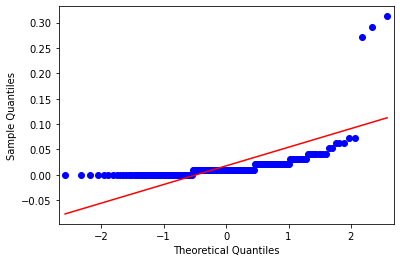

In [32]:
# Choose species & slength
#df_virginica = df[df['species']=='Iris-virginica']
frequency = df2_parl['frequency']
# Q-Q-Plot
fig=sm.qqplot(frequency, line='s')
plt.show()

In [34]:
from scipy.stats import norm
mean  = df2_parl['frequency'].mean()
sd = df2_parl['frequency'].std()
print(sd)

0.03679665636022418


In [35]:
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].astype('category')
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].cat.reorder_categories(['Left', 'Center', 'Right'], ordered=True)
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].cat.codes
print(df2_parl['Groupe parlementaire'])

0      2
1      2
2      0
3      2
4      2
      ..
196    1
197    2
198    0
199    2
200    0
Name: Groupe parlementaire, Length: 201, dtype: int8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].astype('category')
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].cat.reorder_categories(['Left', 'Center', 'Right'], ordered=True)
df2_parl['Groupe parlementaire'] = df2_parl['Groupe parlementaire'].cat.codes
print(df2_parl['Groupe parlementaire'])

<Figure size 1152x1152 with 0 Axes>

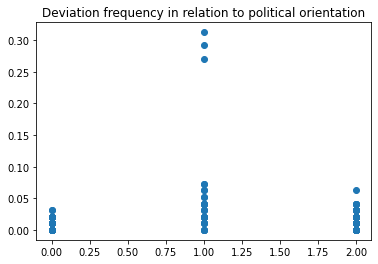

<Figure size 1152x1152 with 0 Axes>

In [36]:
plt.scatter(df2_parl['Groupe parlementaire'], df2_parl['frequency'])
plt.title('Deviation frequency in relation to political orientation')
plt.figure(figsize=(16  ,16))

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


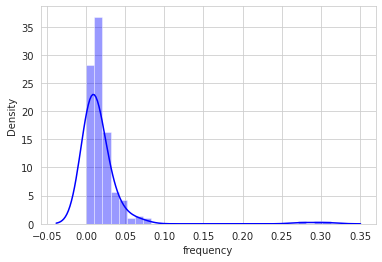

In [105]:
sns.set_style('whitegrid')
sns.distplot(df2_parl['frequency'], color ='blue', bins = 30)

In [37]:
frequency = df2_parl['frequency']
groupe = df2_parl['Groupe parlementaire']
slope, intercept, r_value, p_value, std_err = stats.linregress(frequency,groupe)
print (slope, intercept)

0.49260015310027927 1.1404974164327635


In [38]:
print ('%1.2f +- %1.2f' % (slope,std_err))

0.49 +- 1.75


In [39]:
p_value

0.7789052139334526

In [40]:
("r-squared:", r_value**2)

('r-squared:', 0.00039698952825371767)

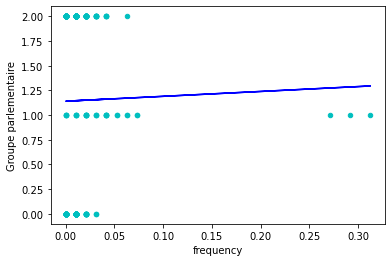

In [41]:
ax = df2_parl.plot(x='frequency',y='Groupe parlementaire',kind="scatter",c='c')
plt.plot(frequency, intercept + slope*frequency, 'b', label='Fitted treated line')
plt.show()

In [42]:
df2_parl['Canton'] = df2_parl['Canton'].astype('category')
df2_parl['Canton'] = df2_parl['Canton'].cat.codes
print(df2_parl['Canton'])

0      23
1       3
2       3
3      24
4       7
       ..
196    11
197    17
198     5
199     2
200     3
Name: Canton, Length: 201, dtype: int8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df2_parl['Sexe'] = df2_parl['Sexe'].astype('category')
df2_parl['Sexe'] = df2_parl['Sexe'].cat.reorder_categories(['M', 'F'], ordered=True)
df2_parl['Sexe'] = df2_parl['Sexe'].cat.codes
print(df2_parl['Sexe'])

0      0
1      0
2      0
3      0
4      1
      ..
196    1
197    0
198    1
199    0
200    1
Name: Sexe, Length: 201, dtype: int8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [44]:
print(df2_parl.columns)

Index(['CouncillorId', 'Groupe parlementaire', 'Canton', 'Age', 'Sexe',
       'Sum_1', 'frequency'],
      dtype='object')


In [45]:
df2_parl = df2_parl.rename(columns={'Deviation frequency': 'Deviation Frequency', 'Groupe parlementaire': 'Political Orientation', 'Sexe': 'Gender'})

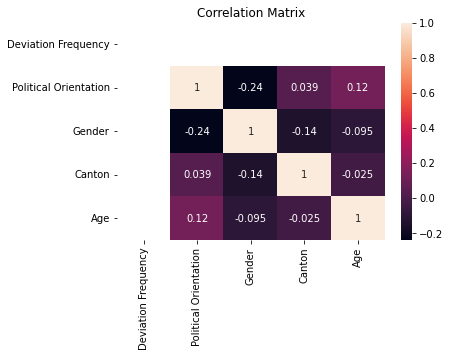

In [46]:
import seaborn as sn

df_center = pd.DataFrame(df2_parl,columns=['Deviation Frequency', 'Political Orientation','Gender', 'Canton', 'Age'])

corrMatrix = df_center.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [47]:
Group_Left = df2_parl[df2_parl['Political Orientation']==0]
Group_Center = df2_parl[df2_parl['Political Orientation']==1]
Group_Right = df2_parl[df2_parl['Political Orientation']==2]

In [48]:
fr_Left = Group_Left['frequency']
fr_Center = Group_Center['frequency']
fr_Right = Group_Right['frequency']

In [49]:
result = stats.kruskal(fr_Left, fr_Center, fr_Right)
print(result)

KruskalResult(statistic=32.86539907474271, pvalue=7.300780108194466e-08)


In [50]:
print(result)

KruskalResult(statistic=32.86539907474271, pvalue=7.300780108194466e-08)


The test statistic equals 32.87. The corresponding p-value is less than 0.05, we can therefore reject the null hypothesis that the median frequency of deviant voting is the same for all three groups.

In [52]:
Group_Center['Canton']

17      0
22     23
27      6
29      9
64     11
67     18
75     10
76     25
86      3
88      0
94     23
98     25
99      8
101    19
106     7
122    11
123    17
130    15
133    24
143     1
144    20
147    15
148    23
149    20
152     6
165     4
168     3
171    21
174     3
176     0
196    11
Name: Canton, dtype: int8

In [53]:
Group_Center['Canton'] = Group_Center['Canton'].astype('category')
Group_Center['Canton'] = Group_Center['Canton'].cat.codes
print(Group_Center['Canton'])

17      0
22     16
27      4
29      7
64      9
67     12
75      8
76     18
86      2
88      0
94     16
98     18
99      6
101    13
106     5
122     9
123    11
130    10
133    17
143     1
144    14
147    10
148    16
149    14
152     4
165     3
168     2
171    15
174     2
176     0
196     9
Name: Canton, dtype: int8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
Group_Center = Group_Center.rename(columns={'frequency': 'Deviation frequency', 'Groupe parlementaire': 'Political Orientation', 'Sexe': 'Gender'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, '')

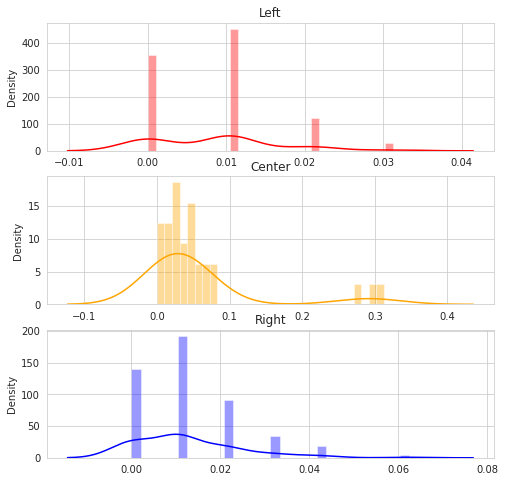

In [108]:
plt.figure(figsize=(8  ,8))
plt.subplot(3,1,1)
sns.set_style('whitegrid')
sns.distplot(Group_Left['frequency'], color ='red', bins = 30)
plt.title('Left')
plt.xlabel('')

plt.subplot(3,1,2)
sns.set_style('whitegrid')
sns.distplot(Group_Center['Deviation frequency'], color ='Orange', bins = 30)
plt.title('Center')
plt.xlabel('')

plt.subplot(3,1,3)
sns.set_style('whitegrid')
sns.distplot(Group_Right['frequency'], color ='Blue', bins = 30)
plt.title('Right')
plt.xlabel('')

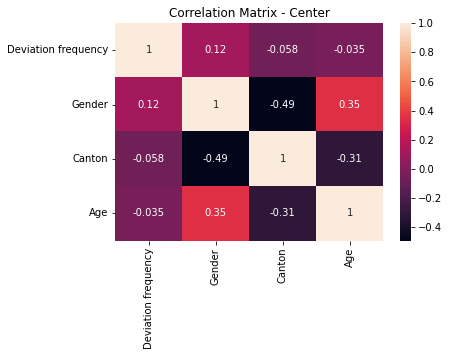

In [55]:
import seaborn as sn


df_center = pd.DataFrame(Group_Center,columns=['Deviation frequency','Gender', 'Canton', 'Age'])

corrMatrix = df_center.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix - Center')
plt.show()

In [56]:
Left_m = Group_Center[Group_Center['Gender']==0]
Left_f = Group_Center[Group_Center['Gender']==1]

In [57]:
fr_CenterM = Left_m['Deviation frequency']
fr_CenterF = Left_f['Deviation frequency']

In [58]:
stats.mannwhitneyu(Left_m['Deviation frequency'],Left_f['Deviation frequency'], alternative='two-sided')

MannwhitneyuResult(statistic=59.0, pvalue=0.13901123123119744)

The test statistic equals 59.0. The corresponding p-value is over 0.05, therefore we cannot reject the null hypothesis that the median frequency of deviant voting is the same for both reported genders.

In [61]:
print(Group_Center.columns)

Index(['CouncillorId', 'Political Orientation', 'Canton', 'Age', 'Gender',
       'Sum_1', 'Deviation frequency'],
      dtype='object')
